In [ ]:
# 2013년 9월 유럽 카드 소지자가 신용카드로 거래한 내용, 284807 건의 거래 가운데 492건의 사기거래
# 변수 v1~v28, Amount 거래 금액, Class 0/1 정상거래/사기거래

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 신용카드 거래 데이터 csv 파일을 로딩(원본)
df = pd.read_csv('d:/workspace/Python2/data/creditcard/data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0 : 정상거래 || 1 : 사기거래)')

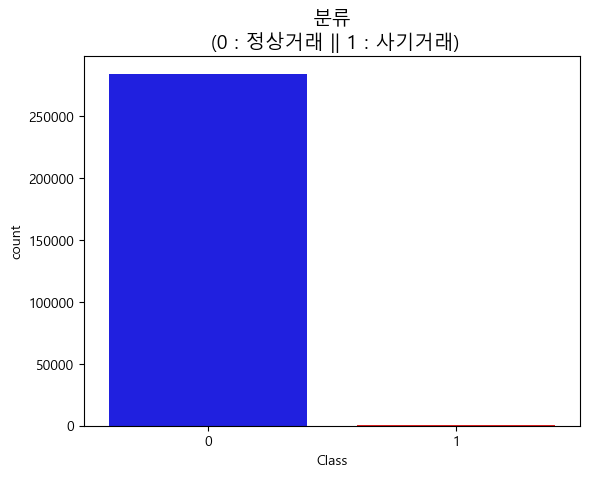

In [5]:
colors = ["blue", 'red']

sns.countplot('Class', data=df, palette=colors)
plt.title('분류\n (0 : 정상거래 || 1 : 사기거래)', fontsize=14)
# 불균형 데이터셋

In [6]:
print("사기거래")
print(df.Amount[df.Class ==1].describe())
print()
print("정상거래")
print(df.Amount[df.Class ==0].describe())

# 사기거래 492건, 정상거래 284315건

사기거래
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

정상거래
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [7]:
train_cols = df.columns[1:29]

X = df[train_cols] # 독립변수
y = df["Amount"]

In [8]:
from sklearn.model_selection import train_test_split # 데이터셋을 나눔

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [9]:
# 다중 회귀분석
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
result = model.fit()

print("회귀계수 : ", result.params)
print("R-squared", result.rsquared)
print("P-value : ", result.pvalues)

# 요약 결과
print(result.summary())

회귀계수 :  V1     -29.071163
V2     -80.740965
V3     -34.990065
V4      17.634759
V5     -70.401473
V6      40.960005
V7      80.872687
V8     -21.747735
V9      -9.858902
V10    -23.512566
V11     -0.032073
V12     -2.442332
V13      1.471566
V14      8.686637
V15     -0.765415
V16     -0.958718
V17      1.750542
V18     10.561197
V19    -17.228021
V20    109.111737
V21     36.131645
V22    -22.338471
V23    -45.934831
V24      2.164762
V25    -22.725643
V26     -1.270434
V27     19.827197
V28      7.125640
dtype: float64
R-squared 0.8140433994103969
P-value :  V1      0.000000e+00
V2      0.000000e+00
V3      0.000000e+00
V4      0.000000e+00
V5      0.000000e+00
V6      0.000000e+00
V7      0.000000e+00
V8      0.000000e+00
V9      0.000000e+00
V10     0.000000e+00
V11     8.908527e-01
V12     1.411787e-24
V13     8.025868e-10
V14    1.903362e-265
V15     3.279689e-03
V16     4.377964e-04
V17     4.152944e-10
V18    3.816983e-301
V19     0.000000e+00
V20     0.000000e+00
V21     0.000

In [10]:
from sklearn.metrics import r2_score
pred = result.predict(X_test)
r2_score(y_test, pred)

0.8000119299914439

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)

In [12]:
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.9166679569637542
검증용: 0.920240380985743
